In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans

In [24]:
image = imread("image.jpg")

w, h, d = image.shape

In [25]:
dataset = image.reshape((w * h, d))

In [71]:
n_colors = 16
n_init = 10
random_state = 123


common_params = {
    "n_init": n_init,
    "random_state": random_state
    
}

km = KMeans(n_clusters = n_colors, **common_params).fit(dataset)

In [72]:
labels = km.predict(dataset)
km.cluster_centers_

array([[186.96385062, 174.48780083, 152.63020747],
       [ 93.94563812,  80.09087098,  55.56363763],
       [140.1722214 , 127.23926199, 104.84100369],
       [ 77.8217117 ,  64.35095047,  40.29422044],
       [238.79019718, 199.88383099, 163.77892958],
       [157.00799271, 143.81130527, 120.31514967],
       [121.80750489, 110.57914277,  89.48410515],
       [202.88700387, 192.13171632, 171.26082261],
       [106.90768299,  52.32029763,  18.25419623],
       [ 61.60219355,  46.36715063,  22.81718883],
       [247.13686718, 224.48033677, 195.99313172],
       [220.49965378, 210.5694172 , 189.66849394],
       [143.0139636 , 111.30880165,  76.15932242],
       [ 50.05843307,  22.97611457,   6.19934145],
       [109.8537976 ,  95.24024784,  70.96154406],
       [171.59506078, 158.79289436, 136.11921232]])

In [73]:
labels

array([13, 13, 13, ...,  3,  3,  3])

In [74]:
res_image = km.cluster_centers_[labels]

In [75]:
res_image = res_image.reshape(w, h, -1)

In [76]:
res_image = res_image.astype(int)

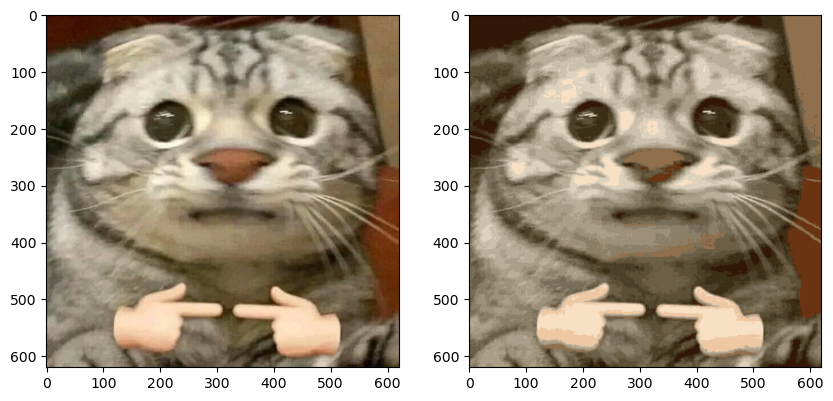

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 8))

ax1.imshow(image)
ax2.imshow(res_image)

In [78]:
np.sum((image - res_image) ** 2, axis = 1)

array([[82694, 33546, 15231],
       [82584, 33876, 14611],
       [78582, 36067, 16234],
       ...,
       [64413, 23469, 23291],
       [64399, 22975, 22751],
       [64480, 23201, 23741]], dtype=int32)